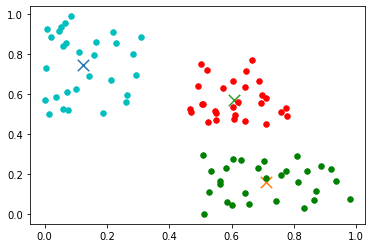

In [7]:
# m1 = data[0]
# m2 = data[1]
# m3 = data[2]

# d1 = {0: m1,1: m2,2: m3}
# v = data[0]
# differences = [diff(m1-v), diff(m2-v), diff(m3-v)]

# differnces.index(min(differences))
# d2 = {0:[],1:[],2:[]}
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class kmeans:
    def __init__(self,k=3,tolerance=0.0001,max_iterations=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        
    def fit(self,data):
        self.averages = {}
        
        for i in range(self.k):
            self.averages[i] = data[i]
        
        for i in range(self.max_iterations):
            self.categories = {}
            for i in range(self.k):
                self.categories[i] = []
            for val in data:
                distances = [np.linalg.norm(val-self.averages[x]) for x in self.averages]
                idx = distances.index(min(distances))
                self.categories[idx].append(val)
                
            prev_avg = dict(self.averages)
            
            for cat in self.categories:
                self.averages[cat] = np.average(self.categories[cat],axis=0)
            
            isOptimal = True
            
            for idx in self.averages:
                original_avg = prev_avg[idx]
                cur_avg = self.averages[idx]
                if np.sum((cur_avg - original_avg)/original_avg*100)> self.tolerance:
                    isOptimal = False
            if isOptimal:
                break

def main():
    df = pd.read_csv('ipl.csv')
    x = df.values
    
    #print(x[:10])
    km = kmeans()
    km.fit(x)
    
    colors = ["c","g","r","b","k"]*10
    
    for p in km.averages:
        plt.scatter(km.averages[p][0],km.averages[p][1], s=130, marker='x')
    
    for d in km.categories:
        color = colors[d]
        for val in km.categories[d]:
            plt.scatter(val[0],val[1],color=color,s=30)
    
    plt.show()
    
if __name__ == '__main__':
    main()